In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import math

# POINT 1

Generation of the random graph by the configuration model.

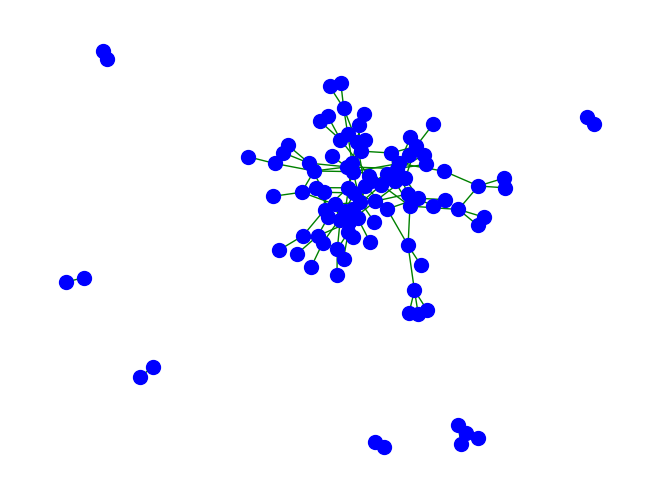

In [ ]:
N = 10000
pi_range = [i/100 for i in range(101)]

def create_graph(N, pi):
    G = nx.Graph()
    G.add_nodes_from(range(0, N))

    num_deg4 = int(N * pi)
    num_deg1 = N - num_deg4

    degree_sequence = [4] * num_deg4 + [1] * num_deg1
    random.shuffle(degree_sequence)

    for i, d in enumerate(degree_sequence):
        G.add_node(i, degree=d)

    stubs = []
    for node, degree in G.nodes(data="degree"):
        for i in range(degree):
            stubs.append(node)

    random.shuffle(stubs)

    while len(stubs) > 1:
        u = stubs.pop()
        v = stubs.pop()
        if u != v and not G.has_edge(u, v):
            G.add_edge(u, v)

    return G

G_trial = create_graph(100,0.5)
nx.draw(G_trial,edge_color='green', node_color='blue', node_size=100)

# POINT 2

POINT 2(b) : Studying of the largest component for different values of N

Text(0, 0.5, 'Largest connected component')

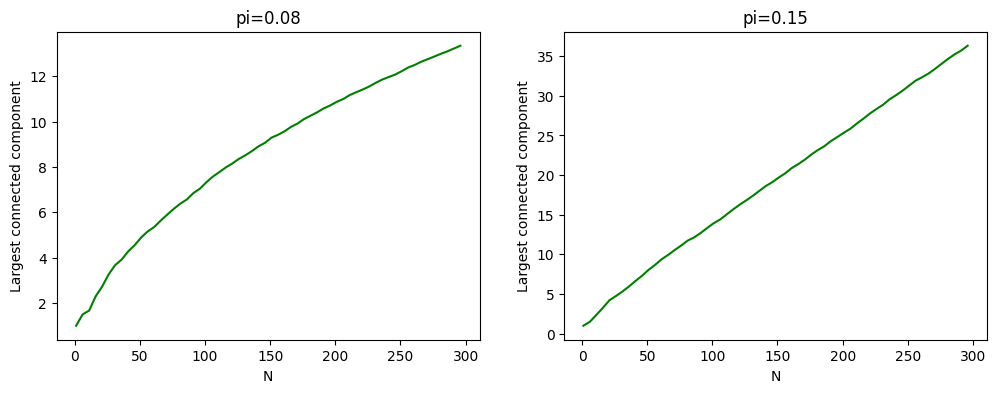

In [ ]:

N_range = [i for i in range(1,300,5)]

larg_sizes = []
mean_larg_sizes = []

for N in N_range:
    for i in range(50):
      G = create_graph(N,0.08)
      largest_cc = max(nx.connected_components(G), key=len)
      larg_size = len(largest_cc)
      larg_sizes.append(larg_size)
    mean_larg_size = np.mean(larg_sizes)
    mean_larg_sizes.append(mean_larg_size)

larg_sizes1 = []
mean_larg_sizes1 = []

for N in N_range:
    for i in range(50):
      G1 = create_graph(N,0.15)
      largest_cc1 = max(nx.connected_components(G1), key=len)
      larg_size1 = len(largest_cc1)
      larg_sizes1.append(larg_size1)
    mean_larg_size1 = np.mean(larg_sizes1)
    mean_larg_sizes1.append(mean_larg_size1)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(N_range, mean_larg_sizes, color = 'green')
plt.title('pi=0.08')
plt.xlabel('N')
plt.ylabel('Largest connected component')
plt.subplot(1,2,2)
plt.plot(N_range, mean_larg_sizes1, color = 'green')
plt.title("pi=0.15")
plt.xlabel('N')
plt.ylabel('Largest connected component')

POINT 2(c)

Comparation between theoretical and numerical result

In [ ]:

pi =0.15

gamma = 1- (1-pi)/2 * (1/math.sqrt(pi)-1) + pi/16 * (1/math.sqrt(pi)-1)**4

L_sizes = []

for N in N_range:
  L = gamma*N
  L_sizes.append(L)

plt.plot(N_range,L_sizes,color = 'red',label='Theoretical')
plt.plot(N_range, mean_larg_sizes1, color = 'green',label='Numerical')
plt.title("pi=0.15")
plt.xlabel('N')
plt.ylabel('Largest connected component')
plt.legend()

Phase transition identification

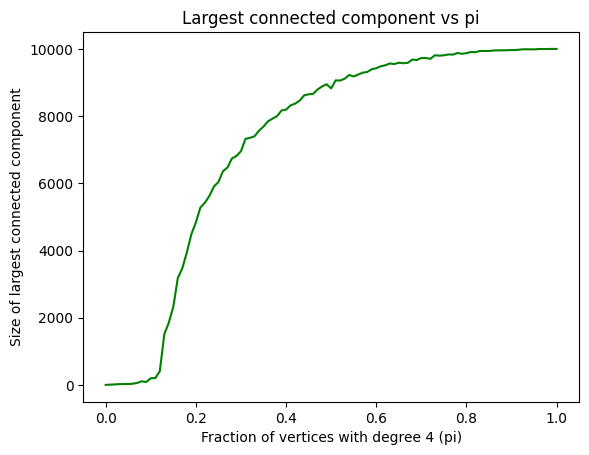

The value of pi at which the giant component emerges is: 0.12


In [ ]:
N=10000

threshold = N/10

giant_sizes = []
has_giant = []

for pi in pi_range:
    G = create_graph(N,pi)
    largest_cc = max(nx.connected_components(G), key=len)
    giant_size = len(largest_cc)
    giant_sizes.append(giant_size)
    has_giant.append(giant_size >= threshold)

plt.figure()
plt.plot(pi_range, giant_sizes, color = 'green')
plt.title("Largest connected component vs pi")
plt.xlabel('Fraction of vertices with degree 4 (pi)')
plt.ylabel('Size of largest connected component')
plt.show()

#Computation of the critical value of pi (the value on which the giant component emerges)

tolerance = 0.001

def binary_search(pi_range, threshold, tolerance):
    upper_bound = len(pi_range) - 1
    lower_bound = 0
    while (upper_bound - lower_bound) > tolerance:
        midpoint = (upper_bound + lower_bound) // 2
        pi_midpoint = pi_range[midpoint]
        G = create_graph(N,pi_midpoint)
        largest_cc = max(nx.connected_components(G), key=len)
        giant_size = len(largest_cc)
        if giant_size >= threshold:
            upper_bound = midpoint
        else:
            lower_bound = midpoint
    return pi_range[(upper_bound + lower_bound) // 2]

pi_critical = binary_search(pi_range, threshold, tolerance)

print("The value of pi at which the giant component emerges is:", pi_critical)


# POINT 3

POINT 3(b) : Generation a random graph for each value of pi and compute the size of the 3-core. Analisis of the behavior of the 3-core as a function pi.

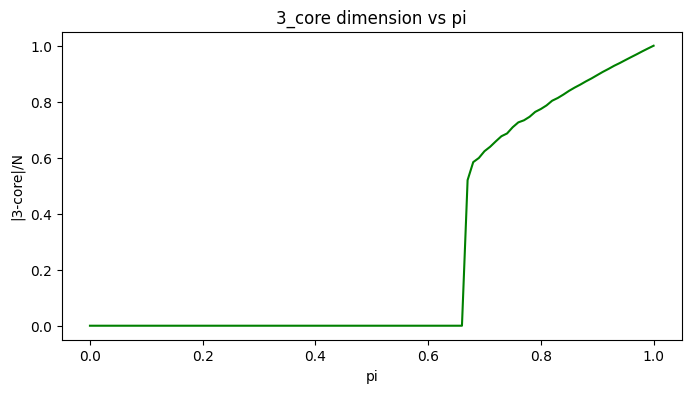

In [ ]:

sizes_3core = []

for pi in pi_range:
    G = create_graph(N,pi)
    core_nums = nx.core_number(G)
    G_3core = G.subgraph(v for v in G.nodes() if core_nums[v] >= 3)
    sizes_3core.append(len(G_3core)/N)

plt.figure(figsize=(8,4))
plt.plot(pi_range,sizes_3core, color='green')
plt.title("3_core dimension vs pi")
plt.xlabel('pi')
plt.ylabel('|3-core|/N')
plt.show()

Finding of the threshold value of pi for the existence of the 3-core

In [ ]:
for pi in pi_range:
    G = create_graph(N,pi)
    core_nums = nx.core_number(G)
    if any(core_nums[v] >= 3 for v in G.nodes()):
      pi_3core = pi
      break

G_3core = G.subgraph(v for v in G.nodes() if core_nums[v] >= 3)
size_3core = len(G_3core)

print("The value of pi at which the 3-core emerges is:", pi_3core)
print("The size of the 3-core is:", size_3core)

The value of pi at which the 3-core emerges is: 0.67
The size of the 3-core is: 5425


# POINT 4

POINT 4(a): Simulation of an Ising Model with MCMC method for different values of T and pi (to visualize the critical temperature)

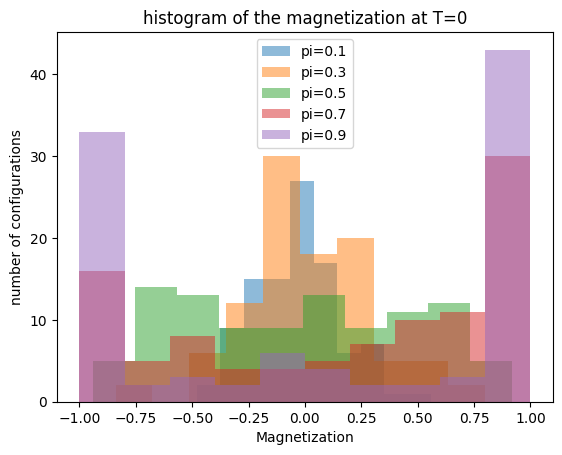

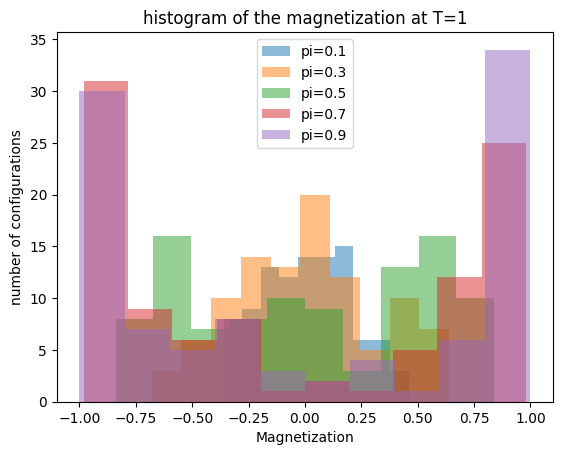

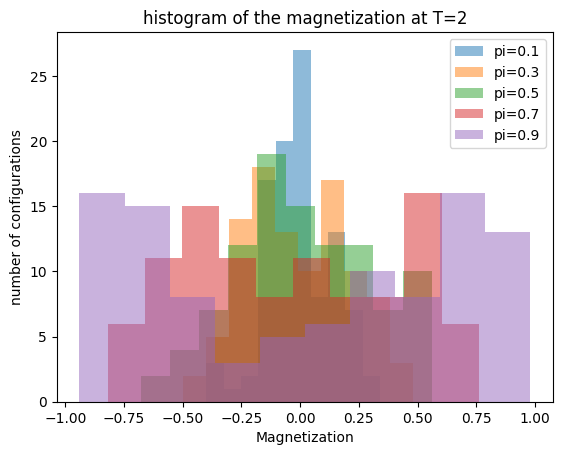

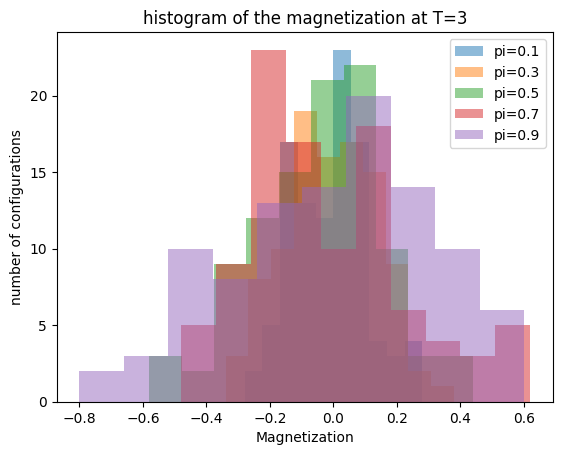

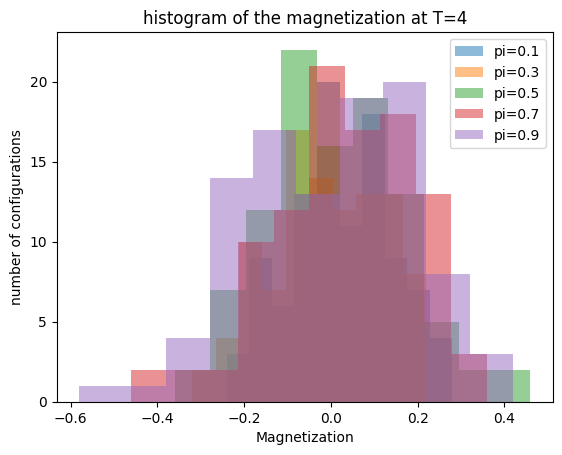

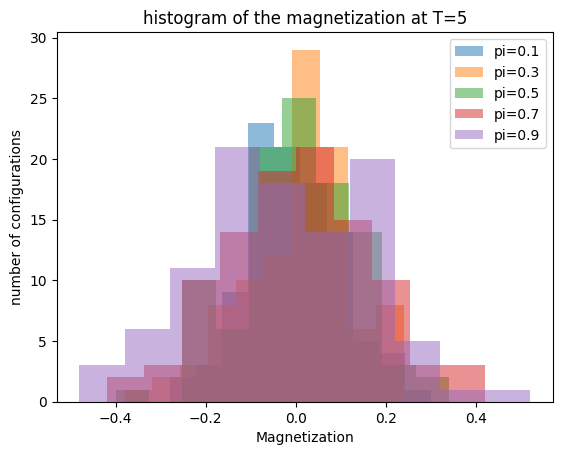

In [ ]:
N = 100
mc_steps = 1000

def ising_model(G, T):
    spins = [random.choice([-1, 1]) for _ in range(len(G))]
    def energy():
        energy = 0
        for u, v in G.edges():
            energy += spins[u] * spins[v]
        return energy

    def magnetization():
        return sum(spins) / len(spins)

    for i in range(mc_steps):
        node = random.choice(list(G.nodes()))
        delta_E = 2 * spins[node] * sum([spins[n] for n in G.neighbors(node)])
        if delta_E < 0 or random.random() < np.exp(-delta_E / T):
            spins[node] *= -1

    return magnetization()

pi_values = [0.1, 0.3, 0.5, 0.7, 0.9]
T_range = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0]
n_steps = 100

for T in T_range:
    for pi in pi_values:
        G = create_graph(N,pi)
        mags = []
        for i in range(n_steps):
            mags.append(ising_model(G,T))
        plt.hist(mags, label=f"pi={pi}", align='mid', alpha = 0.5)
        plt.xlabel("Magnetization")
        plt.ylabel("number of configurations")
        plt.legend()
        plt.title(f"histogram of the magnetization at T=%d" % T)
    plt.show()

POINT 4(b): We did the same of point (a) with belief propagation method for pi=0.5.

In [ ]:
def belief_propagation(G, T, max_iters=100, tol=0.001):
    beta = 1/T
    messages = {node: {neighbor: random.choice([-1, 1]) for neighbor in G.neighbors(node)} for node in G.nodes()}
    beliefs = {node: random.choice([-1, 1]) for node in G.nodes()}

    for iter in range(max_iters):
        for node in G.nodes():
            for neighbor in G.neighbors(node):
                messages[node][neighbor] = 0.5 * T * np.sum(np.log(np.cosh(beta * (messages[k][neighbor] + 1)) / np.cosh(messages[k][neighbor] - 1)) for k in G.neighbors(neighbor) if k != node)
        print(messages)
        for node in G.nodes():
            beliefs[node] = 0.5 * T * np.sum(np.log(np.cosh(beta * (messages[neighbor][node] + 1)) / np.cosh(beta * (messages[neighbor][node] - 1))) for neighbor in G.neighbors(node))
        if iter > 0:
            max_diff = max(abs(beliefs[node] - prev_beliefs[node]) for node in G.nodes())
            if max_diff < tol:
                break

        prev_beliefs = beliefs.copy()

    magnetisation = sum(np.tanh(beta * belief) for belief in beliefs.values()) / len(beliefs)

    return magnetisation

G = create_graph(100, 0.1)
num_samples = 100
T = 1
magnetization = []
bp_magnetization = []
for _ in range(num_samples):
    magnetization.append(ising_model(G, T))
    bp_magnetization.append(belief_propagation(G, T))

plt.hist(magnetization, align='mid', alpha = 0.5, label='montecarlo simulation')
plt.hist(bp_magnetization, align='mid', alpha = 0.5, label='belief propagation')
plt.xlabel("Magnetization")
plt.ylabel("number of configurations")
plt.legend()
plt.title("histogram of the magnetization at T=1")
plt.show()

# POINT 5

POINT 5(a): Histograms of positive predicted values as a function of the strongest correlated pairs

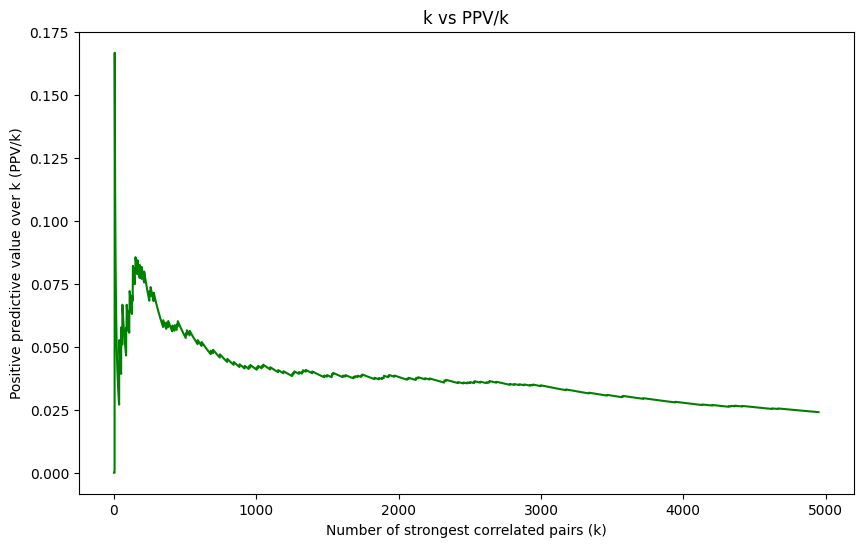

In [ ]:
n_iter = 1000

def ising_model(G, T):
    spins = [random.choice([-1, 1]) for _ in range(len(G))]

    def energy():
        energy = 0
        for u, v in G.edges():
            energy += spins[u] * spins[v]
        return energy

    def magnetization():
        return sum(spins) / len(spins)

    for i in range(n_iter):
        node = random.choice(list(G.nodes()))
        delta_E = 2 * spins[node] * sum([spins[n] for n in G.neighbors(node)])
        if delta_E < 0 or random.random() < np.exp(-delta_E / T):
            spins[node] *= -1

    return spins

T=15 #paramagnetic phase
M = 60
N=100
pi=0.5

G = create_graph(N, pi)

spins_list=[]

for step in range(M):
  spin= ising_model(G,T)
  spins_list.append(spin)

spins=np.array(spins_list)

cov_matrix = np.cov(spins.transpose())

index = []
cov_vet=[]
for i in range(N):
    cov_vet.append(cov_matrix[i][i+1:])
    for j in range(i+1,N):
     index.append([i,j])

corr = []
for lista in cov_vet:
  corr.extend(lista)
corr = np.array(corr)

sorted_corr_index = np.zeros(len(corr))
sorted_corr = np.zeros(len(corr))

corr = corr*(-1)
sorted_corr_index = np.argsort(corr)
sorted_corr = corr[sorted_corr_index]
sorted_corr = sorted_corr *(-1)
sorted_index = [index[i] for i in sorted_corr_index]

k_values = np.arange(1, len(sorted_index) + 1)
ppv_values = []
for k in k_values:
    predicted_edges = set(tuple(lista) for lista in sorted_index[:k])
    true_edges = set(G.edges())
    true_positive = len(predicted_edges & true_edges)
    ppv = true_positive/k
    ppv_values.append(ppv)

plt.figure(figsize=(10,6))
plt.plot(k_values, ppv_values,color='green')
plt.title('k vs PPV/k')
plt.xlabel("Number of strongest correlated pairs (k)")
plt.ylabel("Positive predictive value over k (PPV/k)")
plt.show()




POINT 5(b): Inferring of a graph with mean-field approximation

(60, 100)


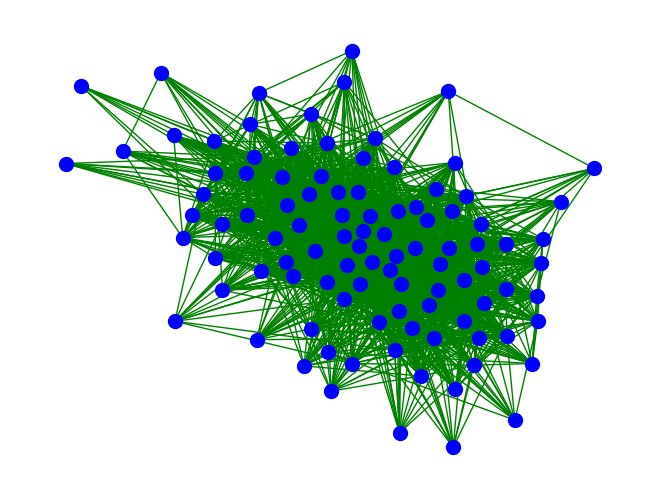

In [ ]:
def infer_graph_from_sample(sample):
    corr = np.cov(sample.T)
    J = -np.linalg.inv(corr)
    N = J.shape[0]
    adj = np.zeros((N,N))
    for i in range(N):
      for j in range(i+1,N):
        if abs(J[i,j]) > 0.5*(abs(J[i,i])+abs(J[j,j])):
          adj[i,j]=1
          adj[j,i]=1
    return adj

G = create_graph(N, pi)

spins_list=[]
for step in range(M):
  spin= ising_model(G,T)
  spins_list.append(spin)

spins=np.array(spins_list)
print(spins.shape)

A=np.zeros((N,N))
A=infer_graph_from_sample(spins)
G1=nx.Graph(A)
nx.draw(G1, edge_color='green',node_color='blue', node_size=100)

POINT 5(c): Histograms of correlation matrix, with the two different cases of connected and non connected pairs

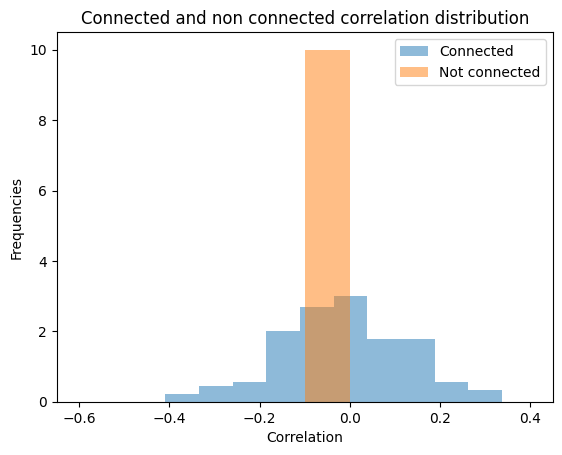

In [ ]:
correlations = np.zeros((N,N))
for i, j in G.edges():
    correlations[i, j] = cov_matrix[i, j]
    correlations[j, i] = cov_matrix[j, i]

nonconnected_corr = []
for i in range(N):
    for j in range(i + 1, N):
        if (i, j) not in G.edges() and (j, i) not in G.edges():
            nonconnected_corr.append(cov_matrix[i, j])

plt.hist(correlations[correlations != 0], alpha=0.5, label='Connected',density=True)
plt.hist(nonconnected_corr[nonconnected_corr != 0], alpha=0.5, label='Not connected',density=True)
plt.legend(loc='upper right')
plt.title('Connected and non connected correlation distribution')
plt.xlabel('Correlation')
plt.ylabel('Frequencies')
plt.show()